In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile

import seaborn as sns
sns.set()

#Make sure to pip install monkeylearn first
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer 
import string

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blue4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\blue4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
tweets = pd.read_csv('data/TrumpTweetsCleaned.csv')
#09-11-2017 to 02-16-2018
before = pd.to_datetime('2017-09-11')
after = pd.to_datetime('2018-02-16')
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
# new_tweets = tweets[(tweets['created_at']>=before) and (tweets['created_at']<=after)]

In [6]:
#preprocessing functions for the dataframe
def delete_punct(text):
    '''
    removes special characters from the document
    '''
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct 
def remove_stopwords(text):
    '''
    removes all stopwords according to the pre-built english dictionary of known stopwords
    '''
    words = [w for w in text if w not in set(stopwords.words('english'))]
    return words
def lemmatize(text):
    '''
    returns the lemmas of each word in the document
    '''
    lemmatized = [lemmatizer.lemmatize(i) for i in text]
    return lemmatized
def joiner(text):
    '''
    joins the comma-separated list into one string
    '''
    joined = " ".join([i for i in text])
    return joined
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

In [7]:
def preproc_pipeline(tweets):
    '''
    The preprocessing pipline applied to each document in the dataframe
    '''
    tweets['text'] = tweets['text'].apply(lambda x: delete_punct(x))
    tweets['text'] = tweets['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
    tweets['text'] = tweets['text'].apply(lambda x: remove_stopwords(x))
    tweets['text'] = tweets['text'].apply(lambda x: lemmatize(x))
    tweets['text'] = tweets['text'].apply(lambda x: joiner(x))
    return tweets

,text,created_at,retweet_count,favorite_count,is_retweet
0,look way crooked hillary handling email case t...,2016-11-01 10:31:00,21459.0,55584.0,False
1,wow leading abc washingtonpost poll 46 45 gone...,2016-11-01 11:55:00,16479.0,39631.0,False
2,crooked hillary allowed run president deleted ...,2016-11-01 12:01:00,23747.0,59656.0,False
3,join tomorrow floridamiami ‚ ä ¢ 12pmhttpstcoa...,2016-11-01 13:35:00,8773.0,17583.0,False
4,terrible crooked didnt report got debate quest...,2016-11-01 14:14:00,32713.0,80724.0,False
5,icymi governor mikepence valley forge pennsylv...,2016-11-01 17:24:00,7662.0,20695.0,False
6,darrellissa good man help win congressional se...,2016-11-01 18:44:00,10566.0,24122.0,False
7,kept jail top doj official involved clinton pr...,2016-11-01 21:15:00,10856.0,18787.0,False
8,trump promise special session repeal obamacare...,2016-11-01 21:16:00,8479.0,18654.0,False
9,hillary adviser wanted avoid supporting israel...,2016-11-01 21:20:00,9122.0,15925.0,False


In [8]:
# fitting sk-learn's TF-IDF Vectorizer to our dataframe and returning list of most important keywords
docs = tweets['text'].tolist()
tfidf = TfidfVectorizer(max_features = 2500, min_df = 10, max_df = .8)
X = tfidf.fit_transform(docs).toarray()
feature_names = tfidf.get_feature_names()

In [9]:
def intersection(l1,l2):
    '''
    finding intersection of elements between two lists
    '''
    return list(set(l1) & set(l2))
def term_extract(df):
    '''
    Will return a column of important keywords in each document determined by TF-IDF 
    Sentiment Analysis via Textblob will only be run on these keywords 
    '''
    df['keywords'] = df['text'].apply(lambda x: intersection(x.split(' '), feature_names))
    df['keywords'] = df['keywords'].apply(lambda x: joiner(x))
    return df
tweets = term_extract(tweets)

In [12]:
tweets['polarity'] = [TextBlob(tweets['text'].values[i]).polarity for i in range(len(tweets))]
tweets['subjectivity'] = [TextBlob(tweets['text'].values[i]).subjectivity for i in range(len(tweets))]
tweets

,text,created_at,retweet_count,favorite_count,is_retweet,keywords,polarity_post,subjectivity_post,polarity,subjectivity
0,look way crooked hillary handling email case t...,2016-11-01 10:31:00,21459.0,55584.0,False,case way crooked look president total mess ema...,-0.218750,0.422917,-0.218750,0.422917
1,wow leading abc washingtonpost poll 46 45 gone...,2016-11-01 11:55:00,16479.0,39631.0,False,12 crooked week gone leading washingtonpost wo...,0.050000,0.550000,0.050000,0.550000
2,crooked hillary allowed run president deleted ...,2016-11-01 12:01:00,23747.0,59656.0,False,deleted rigged crooked allowed getting subpoen...,0.000000,0.100000,0.000000,0.100000
3,join tomorrow floridamiami ‚ ä ¢ 12pmhttpstcoa...,2016-11-01 13:35:00,8773.0,17583.0,False,tomorrow join,0.000000,0.000000,0.000000,0.000000
4,terrible crooked didnt report got debate quest...,2016-11-01 14:14:00,32713.0,80724.0,False,news report got crooked would debate terrible ...,-0.500000,0.550000,-0.500000,0.550000
5,icymi governor mikepence valley forge pennsylv...,2016-11-01 17:24:00,7662.0,20695.0,False,icymi watch pennsylvania governor today httpstco,0.000000,0.000000,0.000000,0.000000
6,darrellissa good man help win congressional se...,2016-11-01 18:44:00,10566.0,24122.0,False,congressional win good seat california help man,0.750000,0.500000,0.750000,0.500000
7,kept jail top doj official involved clinton pr...,2016-11-01 21:15:00,10856.0,18787.0,False,chairman involved official kept probe clinton ...,0.200000,0.250000,0.200000,0.250000
8,trump promise special session repeal obamacare...,2016-11-01 21:16:00,8479.0,18654.0,False,trump session obamacare special repeal promise,0.357143,0.571429,0.357143,0.571429
9,hillary adviser wanted avoid supporting israel...,2016-11-01 21:20:00,9122.0,15925.0,False,wanted supporting israel talking democrat http...,0.250000,0.250000,0.250000,0.250000


In [19]:
# Creating new feature variable - mentions of China in trump tweets
succ = []
for i in range(len(tweets)):
    phrase = tweets['text'].values[i].lower()
    word = 'china'
    if word in phrase:
        succ.append(1)
    else:
        succ.append(0)
tweets['china'] = succ

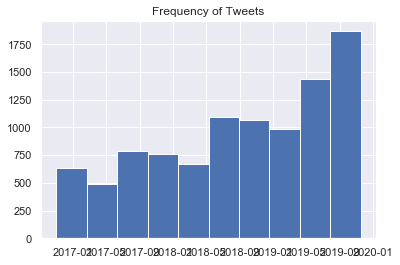

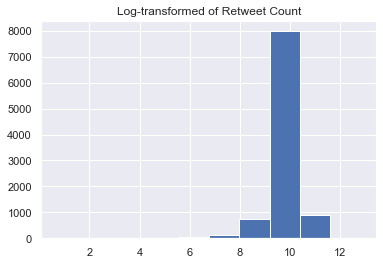

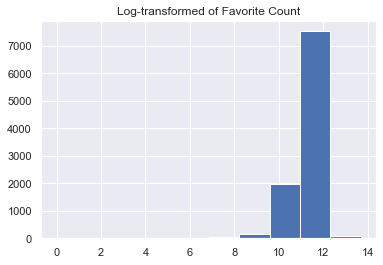

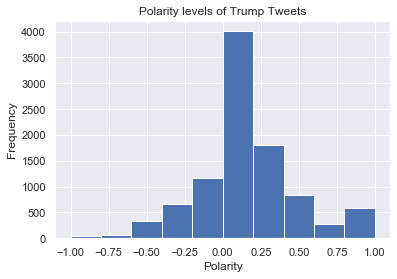

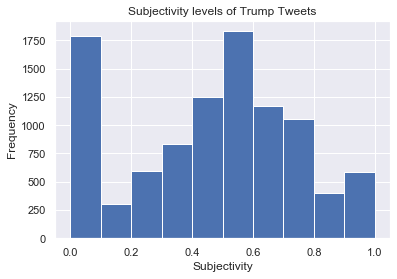

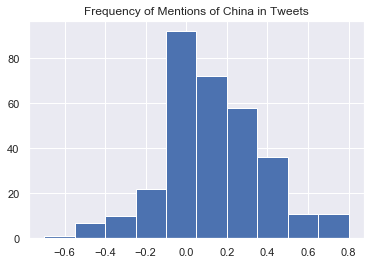

In [17]:
#EDA - copied and pasted from original notebook
temp = plt.hist(tweets['created_at'])
plt.title('Frequency of Tweets')
plt.show()
temp2 = plt.hist(np.log(tweets['retweet_count']))
plt.title('Log-transformed of Retweet Count')
plt.show()
temp3 = plt.hist(np.log(tweets['favorite_count'] + 1))
plt.title('Log-transformed of Favorite Count')
plt.show()
plt.hist(tweets['polarity'])
plt.title('Polarity levels of Trump Tweets')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()
plt.hist(tweets['subjectivity'])
plt.title('Subjectivity levels of Trump Tweets')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

plt.hist(tweets[tweets['china']==1]['polarity'])
plt.title('Frequency of Mentions of China in Tweets')
plt.show()